## Task: Location-based Analysis
 Objective: Perform a geographical analysis of the restaurants in the dataset.

 Steps:
 - Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.
 - Group the restaurants by city or locality and analyze the concentration of restaurants in different areas.
 - Calculate statistics such as the average ratings,cuisines, or price ranges by city or locality.
 - Identify any interesting insights or patterns related to the locations of the restaurants

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

# Display the first few rows of the dataset
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Handeling Missing Values in Cuisin columns

In [2]:
# missing at Albany
df.loc[df['Restaurant Name'] == 'Cookie Shoppe', 'Cuisines'] = 'Coffee, Tea, cookie'
df.loc[df['Restaurant Name'] == "Pearly's Famous Country Cookng", 'Cuisines'] = 'American, Breakfast, Diner'
df.loc[df['Restaurant Name'] == "Jimmie's Hot Dogs", 'Cuisines'] = 'Hot Dogs'
df.loc[df['Restaurant Name'] == "Corkscrew Cafe", 'Cuisines'] = 'Coffee and Tea, Sandwich'
df.loc[df['Restaurant Name'] == 'Dovetail', 'Cuisines'] = 'Italian'
df.loc[df['Restaurant Name'] == 'HI Lite Bar & Lounge', 'Cuisines'] = 'American, Breakfast, Diner'
df.loc[df['Restaurant Name'] == 'Dovetail', 'Cuisines'] = 'Italian'
df.loc[df['Restaurant Name'] == 'Hillstone', 'Cuisines'] = 'American, BBQ, Sandwich'
df.loc[df['Restaurant Name'] == "Leonard's Bakery", 'Cuisines'] = 'Breakfast, Burger'
df.loc[df['Restaurant Name'] == 'Tybee Island Social Club', 'Cuisines'] = 'American, Seafood, Southern'


### Replacing incorrect Names in column 'Restaurant Name' and 'City'

In [3]:

# Replace incorrect names with correct ones
df['Restaurant Name'] = df['Restaurant Name'].replace({
   'Caf� Daniel Briand': 'Café Daniel Briand','Caf�� Daniel Briand':'Café Daniel Briand',
   'Pizza � Bessa': 'Pizza à Bessa','Pizza �� Bessa':'Pizza à Bessa',
   'Sandubas Caf�': 'Sandubas Café','Sandubas Caf��':'Sandubas Café',
   'Tayp�': 'Taypé','Tayp��': 'Taypé',
   'Manzu�': 'Manzú','Manzu��': 'Manzú',
   'Braseiro da G�vea': 'Braseiro da Gávea','Braseiro da G��vea': 'Braseiro da Gávea',
   'Zaz� Bistr� Tropical': 'Zazá Bistrô Tropical','Zaz�� Bistr�� Tropical': 'Zazá Bistrô Tropical',
   'Fil� de Ouro': 'Filé de Ouro','Fil�� de Ouro': 'Filé de Ouro',
   'Apraz�_vel': 'Aprazível',
   'Terra�_o It�lia': 'Terraço Itália','Terra�_o It��lia': 'Terraço Itália',
   'Divino Fog�o': 'Divino Fogão','Divino Fog��o': 'Divino Fogão',
   'Esquina Mocot�_': 'Esquina Mocotó',
   'Cev�_che Tapas Bar & Restaurant': 'Ceviché Tapas Bar & Restaurant',
   'Caf� Tu Tu Tango': 'Café Tu Tu Tango',   'Caf�� Tu Tu Tango': 'Café Tu Tu Tango',
   "Hollerbach's Willow Tree Caf�": "Hollerbach's Willow Tree Café",   "Hollerbach's Willow Tree Caf��": "Hollerbach's Willow Tree Café",
   'MoMo Caf� - Courtyard By Marriott': 'MoMo Café - Courtyard By Marriott',
       'MoMo Caf�� - Courtyard By Marriott': 'MoMo Café - Courtyard By Marriott',
   'Caf� Bogchi': 'Café Bogchi',   'Caf�� Bogchi': 'Café Bogchi',
    'Caf� Kitchen': 'Café Kitchen','Caf�� Kitchen': 'Café Kitchen',
   'Gallery Caf� - Hyatt Place': 'Gallery Café - Hyatt Place',   'Gallery Caf�� - Hyatt Place': 'Gallery Café - Hyatt Place',
   "Longitude 77��03' Bar - Le Meridien Gurgaon": "Longitude 77°03' Bar - Le Meridien Gurgaon",
   'bu�no': 'buñno',
   'Queens Caf�': 'Queens Café','Queens Caf��': 'Queens Café',
   'Caf� Gramophone': 'Café Gramophone','Caf�� Gramophone': 'Café Gramophone',
   'M Cr�me': 'M Crème','M Cr��me': 'M Crème',
   'West�ross': 'Westcross','West��ross': 'Westcross',
   'bu�no': 'buñno','bu��no': 'buñno',
   "Chawla's�_": "Chawla's",
   "Chawla's�_": "Chawla's",
   'Caf� Burger BC': 'Café Burger BC','Caf�� Burger BC': 'Café Burger BC',
   'The Basement Caf�': 'The Basement Café','The Basement Caf��': 'The Basement Café',
   'Caf� Riverrun': 'Café Riverrun','Caf�� Riverrun': 'Café Riverrun',
   'Con�_u': 'Coñu',
   'Sahib�s Barbeque by Ohri�s': "Sahib's Barbeque by Ohri's",'Sahib��s Barbeque by Ohri��s': "Sahib's Barbeque by Ohri's",
   'Hobnob Gourmet Caf�bar': 'Hobnob Gourmet Cafébar','Hobnob Gourmet Caf��bar': 'Hobnob Gourmet Cafébar',
   'Chemistry Caf�': 'Chemistry Café','Chemistry Caf��': 'Chemistry Café',
   'NESCAF� Illusions': 'NESCAFÉ Illusions',
   "Chawla's�_": "Chawla's",
   'It�s Sinful': "It's Sinful", 'It��s Sinful': "It's Sinful",
   'Caf� MRP': 'Café MRP','Caf�� MRP': 'Café MRP',
   'D�_ner Grill': 'Dîner Grill',
   'Caf� Healthilicious': 'Café Healthilicious',
   'D�_ner Grill': 'Dîner Grill',
   'LaBont�': 'LaBonté',
   'Chhalava - �__Lava': 'Chhalava - Lava',
   'The Walled City - Caf� & Lounge': 'The Walled City - Café & Lounge',
   'Bon App�tit': 'Bon Appétit',
   "Chawla's�_": "Chawla's",
   'Cottage Caf� by Smoothie factory': 'Cottage Café by Smoothie factory',
   'Dialogue Lounge & Caf�': 'Dialogue Lounge & Café',
   "Ping's Caf� Orient": "Ping's Café Orient",
   "Chawla's�_": "Chawla's",
   'Delhite P�tisserie': 'Delhite Pâtisserie',
   'Arabian & Turkish Caf�': 'Arabian & Turkish Café',
   'D�_ner Grill': 'Dîner Grill',
   'Die B�ckerei': 'Die Bäckerei',
   'High Street Caf�': 'High Street Café',
   'The Junkyard Caf�': 'The Junkyard Café',
   'AMPM Caf� & Bar': 'AMPM Café & Bar',
   'Caf� Foreground': 'Café Foreground',
   "Chawla's�_": "Chawla's",
   'Rosart� Chocolate': 'Rosarté Chocolate',
   'Caf� Befikre': 'Café Befikre',
   'Caf� 101': 'Café 101',   'Caf�� 101': 'Café 101',
   'Tin Town Caf�': 'Tin Town Café',
   'Superstar Caf�': 'Superstar Café',
   'H�_agen-Dazs': 'Häagen-Dazs',
   'The Fashion Street Caf�': 'The Fashion Street Café',
   'Hearken Caf�': 'Hearken Café',
   'Remember Me Caf�': 'Remember Me Café',
   '4 Barrels Caf� & Lounge': '4 Barrels Café & Lounge',
   'Caf� Knosh - The Leela Ambience Convention Hotel': 'Café Knosh - The Leela Ambience Convention Hotel',
       'Caf�� Knosh - The Leela Ambience Convention Hotel': 'Café Knosh - The Leela Ambience Convention Hotel',
   'The Village Caf�': 'The Village Café','The Village Caf��': 'The Village Café',
   'Phonebooth Caf�': 'Phonebooth Café','Phonebooth Caf��': 'Phonebooth Café',
   'Caf� Doo Ghoont': 'Café Doo Ghoont','Caf�� Doo Ghoont': 'Café Doo Ghoont',
   'TBH �� To Be Healthy': 'TBH – To Be Healthy',
   'They�_����': 'They',
   'Caff� La Poya': 'Caffè La Poya',
   'More Than Caf�': 'More Than Café','More Than Caf��': 'More Than Café',
   'Caff� La Poya': 'Caffè La Poya','Caff�� La Poya': 'Caffè La Poya',
   'Elixir Health Caf�': 'Elixir Health Café','Elixir Health Caf��': 'Elixir Health Café',
   '#Urban Caf�': '#Urban Café','#Urban Caf��': '#Urban Café',
   'The Chickmunks Caf�': 'The Chickmunks Café', 'The Chickmunks Caf��': 'The Chickmunks Café',
   "Chawla's�_": "Chawla's",
   'KBC�_': 'KBC',
   "Chef's Basket Pop Up Caf�": "Chef's Basket Pop Up Café","Chef's Basket Pop Up Caf��":"Chef's Basket Pop Up Café",
   'Saut�ed Stories': 'Sautéed Stories','Saut��ed Stories': 'Sautéed Stories',
   'Freshco - The Health Caf�': 'Freshco - The Health Café',   'Freshco - The Health Caf��': 'Freshco - The Health Café',
   'Eden Noodles Cafe �__·�_��_��_��': 'Eden Noodles Cafe','Eden Noodles Cafe �__·�_��_��_��':'Eden Noodles Cafe',
   'Grand Caf� & Beach': 'Grand Café & Beach',    'Grand Caf�� & Beach': 'Grand Café & Beach',
   'Masaba��۱ Kebap�_۱s۱': 'Masabaşı Kebapçısı',
   'Me��hur Tavac۱ Recep Usta': 'Meşhur Tavacı Recep Usta',
   '�ukura��a Sofras۱': 'Çukurağa Sofrasɪ',
   'Me��hur �_z�_elik Aspava':'Meşhur Özçelik Aspava',
    'Masaba��۱':'Masabaşı',
    'D�_vero��lu':'Döveroğlu',
    'Pizza ��l Forno':'Pizza ël Forno',
    'Emirgan S�_ti��':'Emirgan Sütüş',
    'Leman K�_lt�_r':'Leman Kültür',
    'Dem Karak�_y':'Dem Karaköy',
    'Karak�_y G�_ll�_o��lu':'Karaköy Güllüoğlu',
    'Ceviz A��ac۱':'Ceviz Ağacɪ',
    'A���k Kahve':'Açık Kahve',
    'Caf�� Foreground': 'Café Foreground',
    'Rosart�� Chocolate':'Rosart Chocolate',
    'Caf�� Befikre':'Café Befikre',
    'Tin Town Caf��':'Tin Town Café',
    'Superstar Caf��':'Superstar Café',
    'The Fashion Street Caf��':'The Fashion Street Café',
    'Hearken Caf��':'Hearken Café',
    'Remember Me Caf��':'Remember Me Café',
    '4 Barrels Caf�� & Lounge':'4 Barrels Café & Lounge',
})

In [4]:
df['City'] = df['City'].replace({
    'Bras�_lia':'Brasília',
    'S��o Paulo':'São Paulo',
    '��stanbul': 'İstanbul'
})

In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,İstanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Ağacɪ,208,İstanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,İstanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Açık Kahve,208,İstanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Geographical analysis

In [6]:
!pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 57.9 MB/s eta 0:00:00


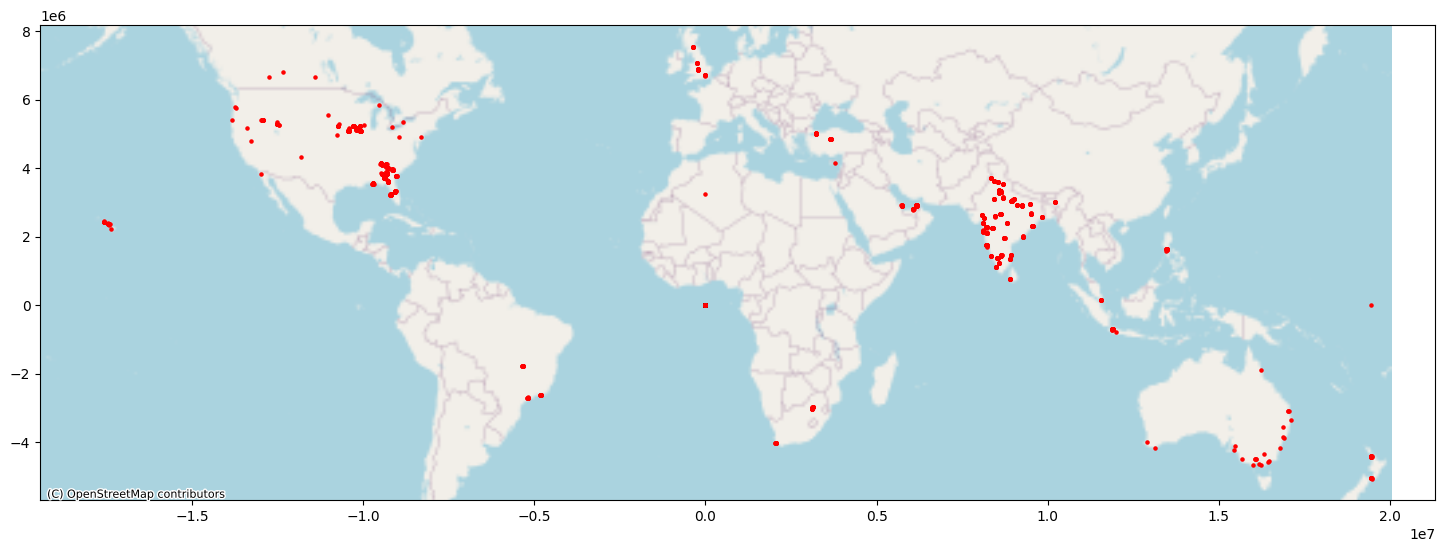

In [7]:

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.crs= 'EPSG:4326'
gdf=gdf.to_crs('EPSG:3857')

fig, ax=plt.subplots(figsize=(18,16))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [8]:

import folium
from folium.plugins import MarkerCluster


# Create a map centered around an approximate central latitude and longitude
center_lat, center_long = df['Latitude'].mean(), df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Add marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add restaurant locations to the map
for idx, row in df.iterrows():
    popup_text = f"City:<b>{row['City']}</b><br>Restaurant Name: <b>{row['Restaurant Name']}</b><br>Cuisines: <b>{row['Cuisines']}</b><br>Aggregate rating: <b>{row['Aggregate rating']}</b>"
    iframe = folium.IFrame(html=popup_text, width=300, height=150)
    popup = folium.Popup(iframe, max_width=300)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='cutlery')
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save('_map.html')


### Statistical Analysis

In [9]:
# Group by City
city_group = df.groupby('City').size().reset_index(name='Count')
city_group = city_group.sort_values(by='Count', ascending=False)
print('Group by City')
city_group


Group by City


,City,Count
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


In [10]:
# Group by Locality
locality_group = df.groupby('Locality').size().reset_index(name='Count')
locality_group = locality_group.sort_values(by='Count', ascending=False)
print("Group by locality")
locality_group


Group by locality


,Locality,Count
216,Connaught Place,122
835,Rajouri Garden,99
971,Shahdara,87
274,Defence Colony,86
639,Malviya Nagar,85
...,...,...
796,"Plaza Mall, MG Road",1
385,Grovetown,1
798,Podanur,1
799,Pondok Aren,1


In [11]:
# Calculate average rating by city
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
avg_rating_by_city = avg_rating_by_city.sort_values(by='Aggregate rating', ascending=False)
print("Average rating by city")
avg_rating_by_city



Average rating by city


,City,Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
...,...,...
88,New Delhi,2.438845
83,Montville,2.400000
78,Mc Millan,2.400000
89,Noida,2.036204


In [12]:
# Calculate average cost for two by city
avg_cost_by_city = df.groupby('City')['Average Cost for two'].mean().reset_index()
avg_cost_by_city = avg_cost_by_city.sort_values(by='Average Cost for two', ascending=False)
print("Average cost for two by city")
avg_cost_by_city


Average cost for two by city


,City,Average Cost for two
59,Jakarta,308437.500000
125,Tangerang,250000.000000
19,Bogor,160000.000000
13,Bandung,150000.000000
94,Pasay City,3333.333333
...,...,...
78,Mc Millan,10.000000
57,Inverloch,7.000000
64,Lakes Entrance,7.000000
37,Dicky Beach,7.000000


Jakarta city is the most costly city among all others for two people.

In [13]:
# Calculate statistics for different metrics
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean',
    'Votes': 'sum'
}).reset_index()
city_stats = city_stats.sort_values(by='Votes', ascending=False)
print("Statistics for different metrics")

city_stats


Statistics for different metrics


,City,Aggregate rating,Average Cost for two,Votes
88,New Delhi,2.438845,596.088069,628340
50,Gurgaon,2.651431,714.016100,132160
89,Noida,2.036204,539.490741,73488
14,Bangalore,4.375000,1232.500000,56115
63,Kolkata,4.255000,1272.500000,44593
...,...,...,...,...
80,Miller,3.400000,0.000000,11
77,Mayfield,2.900000,20.000000,11
102,Potrero,3.300000,25.000000,9
28,Cochrane,3.100000,25.000000,6


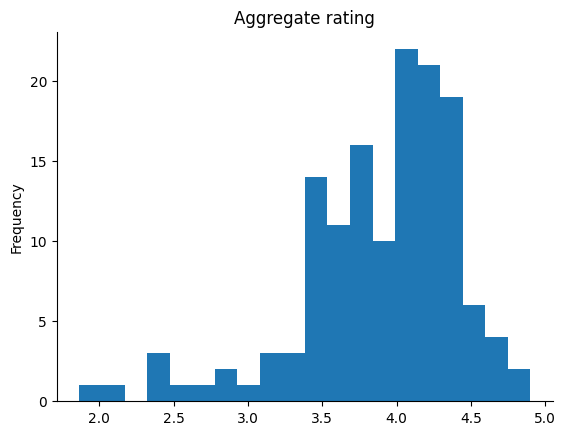

In [14]:
# @title Aggregate rating
from matplotlib import pyplot as plt
avg_rating_by_city['Aggregate rating'].plot(kind='hist', bins=20, title='Aggregate rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# Display interesting insights
# For example, cities with highest and lowest average ratings
highest_rated_city = avg_rating_by_city.loc[avg_rating_by_city['Aggregate rating'].idxmax()]
lowest_rated_city = avg_rating_by_city.loc[avg_rating_by_city['Aggregate rating'].idxmin()]

print(f"Highest Rated City: {highest_rated_city['City']} with an average rating of {highest_rated_city['Aggregate rating']}")
print(f"Lowest Rated City: {lowest_rated_city['City']} with an average rating of {lowest_rated_city['Aggregate rating']}")



Highest Rated City: Inner City with an average rating of 4.9
Lowest Rated City: Faridabad with an average rating of 1.8669322709163347


In [16]:
# Analyze the distribution of cuisines in a particular city
city = 'New Delhi'
cuisines_in_city = df[df['City'] == city]['Cuisines'].value_counts()
print(f"Cuisines in {city}:")

cuisines_in_city


Cuisines in New Delhi:


Cuisines
North Indian                            658
North Indian, Chinese                   284
Fast Food                               242
Chinese                                 228
North Indian, Mughlai                   207
                                       ... 
North Indian, Fast Food, Bihari           1
Modern Indian, North Indian               1
Cafe, Desserts, Healthy Food, Juices      1
Italian, Mediterranean                    1
Awadhi                                    1
Name: count, Length: 892, dtype: int64

In [17]:
# prompt: give code to get the highest rated cuisines

# Group by Cuisines and calculate average rating
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(by='Aggregate rating', ascending=False)

# Get the highest rated cuisine
highest_rated_cuisine = avg_rating_by_cuisine.iloc[0]['Cuisines']

print(f"Highest Rated Cuisine: {highest_rated_cuisine}")


Highest Rated Cuisine: Italian, Deli


### Widgets

In [18]:

import ipywidgets as widgets
from ipywidgets import interact

def plot_pie_chart(city):
    # Filter data for the specified city and cuisines with 500 or more votes
    df_city = df[(df['City'] == city) & (df['Votes'] >= 500)]

    # Extract and count the cuisines in the filtered data
    cuisines_series = df_city['Cuisines']

    # Split and count each cuisine individually
    cuisines_list = cuisines_series.str.split(', ').explode()
    cuisines_counts = cuisines_list.value_counts()

    # Calculate the percentage of each cuisine
    cuisines_percent = cuisines_counts / cuisines_counts.sum() * 100

    # Group small slices into 'Others'
    threshold = 5  # 5%
    large_cuisines = cuisines_percent[cuisines_percent >= threshold]
    small_cuisines = cuisines_percent[cuisines_percent < threshold]
    if not small_cuisines.empty:
        large_cuisines['Others'] = small_cuisines.sum()

    # Plot the distribution as a pie chart
    plt.figure(figsize=(10, 7))
    large_cuisines.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
    plt.title(f'Distribution of Cuisines in {city} (with 500 or more votes)')
    plt.ylabel('')  # Hide the y-label
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.show()

# Get the unique city names for the dropdown
city_names = df['City'].unique()

# Create the dropdown widget
city_dropdown = widgets.Dropdown(
    options=city_names,
    value=city_names[0],
    description='City:'
)

# Use the interact function to create the widget
interact(plot_pie_chart, city=city_dropdown)


interactive(children=(Dropdown(description='City:', options=('Makati City', 'Mandaluyong City', 'Pasay City', …

<function __main__.plot_pie_chart(city)>